In [90]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv("/work/users/l/s/lswhiteh/timesweeper-experiments/d_simulans/scripts/all_merged.tsv", sep="\t")

In [92]:
rs = {rep: df[df['rep'] == rep].sort_values("SSV_Score", ascending=False)[:100] for rep in range(1, 11)}

In [93]:
rs[1]

,Chrom,BP,Class,Neut_Score,SSV_Score,s_coeff,Win_Start,Win_End,rep,fet
3252484,X,4204976,SSV,0.000,1.000,0.148,4204066,4205316,1,36.48617156
3682144,X,18682659,SSV,0.000,1.000,0.254,18679113,18683398,1,22.76514676
3226667,X,3163554,SSV,0.000,1.000,0.178,3162719,3165061,1,9.91055108
2190355,3L,4831384,SSV,0.000,1.000,0.278,4830727,4831900,1,12.57779252
3226664,X,3163539,SSV,0.000,1.000,0.127,3162296,3164762,1,10.83917386
...,...,...,...,...,...,...,...,...,...,...
3609912,X,16204571,SSV,0.001,0.999,0.218,16203393,16205434,1,16.24981043
3233986,X,3416932,SSV,0.001,0.999,0.171,3415917,3417682,1,24.76790336
2002605,3L,1090122,SSV,0.001,0.999,0.135,1089483,1090590,1,10.29424758
2002047,3L,1076361,SSV,0.001,0.999,0.135,1075734,1077005,1,12.00387961


In [94]:
rs[2]

,Chrom,BP,Class,Neut_Score,SSV_Score,s_coeff,Win_Start,Win_End,rep,fet
5891655,X,8215094,SSV,0.000,1.000,0.189,8214793,8215704,2,14.45195098
4726925,2L,18919733,SSV,0.000,1.000,0.123,18919108,18920499,2,13.00699762
4397494,2L,12971616,SSV,0.001,0.999,0.206,12971110,12972293,2,15.99029510
4221022,2L,9960376,SSV,0.001,0.999,0.224,9960167,9960733,2,9.03343926
5715002,X,2431036,SSV,0.001,0.999,0.190,2430447,2431295,2,15.22607098
...,...,...,...,...,...,...,...,...,...,...
6235112,X,20126309,SSV,0.002,0.998,0.265,20125585,20128016,2,7.40963149
5776300,X,4480468,SSV,0.002,0.998,0.163,4480251,4481049,2,10.29734975
5129506,2R,6917370,SSV,0.002,0.998,0.104,6917015,6917851,2,9.08056610
4804132,2R,296093,SSV,0.002,0.998,0.091,295471,296289,2,16.32964019


In [95]:
hits = []
for rep, rdf in rs.items():
    rephits = []
    for srep, sdf in rs.items():
        shits = []
        if rep != srep:
            for idx, hit in rdf.iterrows():
                shits.append(len(sdf[(sdf["Chrom"] == hit["Chrom"]) & (sdf["BP"] > hit["BP"] - 5000) & (sdf["BP"] < hit["BP"] + 5000)]))
                
            rephits.append(shits)
    hits.append(rephits)

In [96]:
foo = np.array(hits)
foo.shape
foo

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [97]:
rs = {rep: df[df['rep'] == rep].sort_values("fet", ascending=False)[:100] for rep in range(1, 11)}

In [98]:
fhits = []
for rep, rdf in rs.items():
    rephits = []
    for srep, sdf in rs.items():
        shits = []
        if rep != srep:
            for idx, hit in rdf.iterrows():
                shits.append(len(sdf[(sdf["Chrom"] == hit["Chrom"]) & (sdf["BP"] > hit["BP"] - 5000) & (sdf["BP"] < hit["BP"] + 5000)]))
                
            rephits.append(shits)
    fhits.append(rephits)

In [113]:
bar = np.array(fhits)
bar.shape
#bar[4]


(10, 9, 100)

In [100]:
foo[foo > 0]

array([1, 3, 1, 1, 3, 2, 2, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 1, 7, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 8, 1, 1, 1, 1])

(array([61., 11.,  5.,  0.,  1.,  1.,  0.,  0.,  1.,  1.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

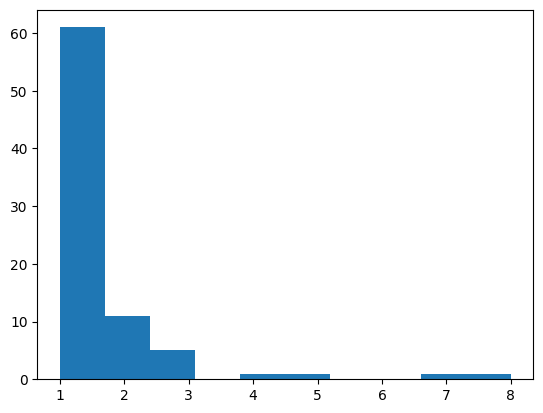

In [101]:
plt.hist(foo[foo > 0].flatten())


(array([ 4.,  1.,  0.,  0.,  0.,  0., 23.,  0.,  0., 15.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 10 artists>)

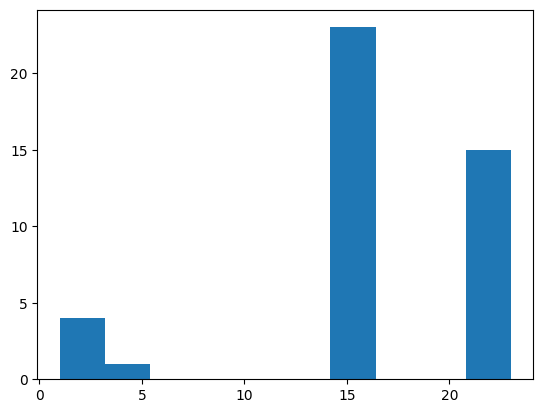

In [102]:
plt.hist(bar[bar > 0].flatten())

Text(0.5, 0, 'Number of Replications')

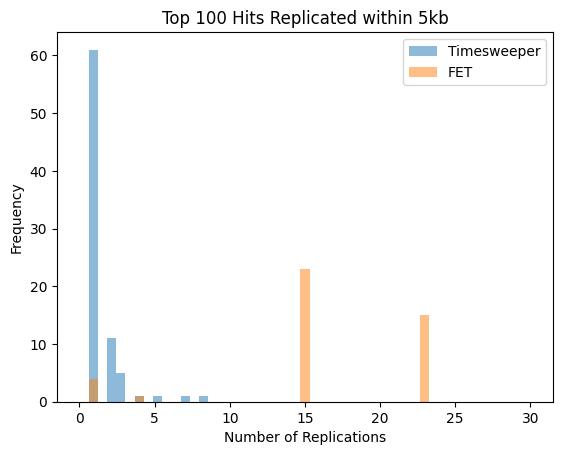

In [108]:
bins = np.linspace(0, 30)

plt.hist(foo[foo> 0].flatten(), bins, alpha=0.5, label="Timesweeper")
plt.hist(bar[bar > 0].flatten(), bins, alpha=0.5, label="FET")
plt.legend()
plt.title("Top 100 Hits Replicated within 5kb")
plt.ylabel("Frequency")
plt.xlabel("Number of Replications")